The dataset contains several features, such as:

ID: Identifier for each restaurant.
Search Count: Number of searches.
Survey: Customer survey ratings.
Google Sense: Metric related to Google data.
Branch Counts: Number of branches.
Decoded Marketing Area: Marketing zone data.
Grade: The target variable for grading (1, 2, 3, 4).

I'll identify the most influential features for predicting the restaurant grade by using feature importance from a Random Forest classification model.

I should do preprocessing step before feature importance step. This is because the data should be cleaned.

The data of this dataset is already cleaned and numeric.

The reason why I chose Random Forest classification model is because the grades are ordinal categorical from 1 to 4.

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
grading_data_path = r'C:\Users\SURFACE\Desktop\Sina Mostafidi (Task)\Data Science Task Dataset Sheet 2.xlsx'
grading_data = pd.read_excel(grading_data_path)

In [3]:
print(grading_data.head())

     ID  Search Count  Survey  Google Sense  Branch Counts  \
0  1001          5435       8        3133.2              2   
1  1002          6938      35        6816.6             35   
2  1004          5008       6         339.7              0   
3  1005          3100       0         838.5              0   
4  1006          2760       3        1045.0              0   

   decoded marketing area  Grade  
0                      14      1  
1                       6      1  
2                      29      2  
3                      20      3  
4                      10      4  


In [4]:
X = grading_data.drop(columns=['ID', 'Grade'])

In [5]:
y = grading_data['Grade']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
y_pred = rf_model.predict(X_test)

In [9]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.50      0.12      0.20         8
           4       0.91      0.99      0.95        71

    accuracy                           0.89        80
   macro avg       0.35      0.28      0.29        80
weighted avg       0.86      0.89      0.86        80



c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In Grade 1:
Precision, Recall and F1-score are all zero because there was only 1 sample, and the model didn't predict it correctly.

In Grade 2:
Precision, Recall and F1-score are all zero because there were no instances in the test set for Grade 2 (support=0), meaning no predictions were made for this Grade.

In Grade 3:
Precision is 0.50 and the model correctly identified 50% of the predicted Grade 3 samples.
Recall is 0.12 and the model correctly identified only 12% of the actual Grade 3 samples.
F1-score is 0.20 and the F1 score is low due to poor precision and recall.
Support is 8 which means there were 8 instances of Grade 3 in the test set.

In Grade 4:
Precision is 0.91 and the model was highly accurate in predicting Grade 4.
Recall is 0.99 and the model almost correctly classified all instances of Grade 4.
F1-score is 0.95 and this is indicating good balance between precision and recall.
Support is 71 which means the majority Grade, with 71 instances in the test set.

Macro avg is treating each Grade equally.
Weighted avg is weighted by the number of instances in each Grade.

In [10]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.8875


In [11]:
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

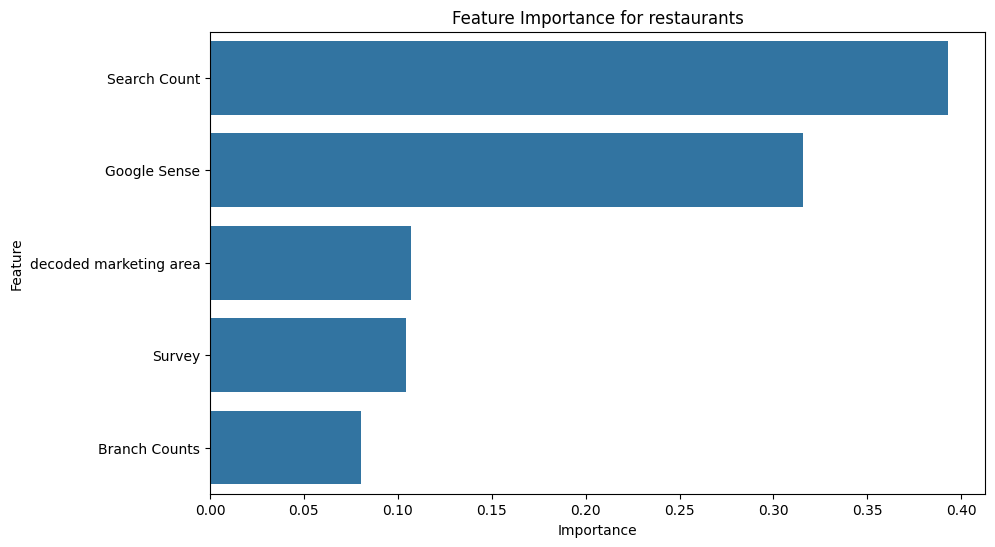

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for restaurants')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Feature importance is plotted to show which features have the most influence on predicting restaurant grades.

In [13]:
import joblib
joblib.dump(rf_model, 'random_forest_grading_model.pkl')

['random_forest_grading_model.pkl']

In [14]:
print("Model training complete and saved as 'random_forest_grading_model.pkl'.")

Model training complete and saved as 'random_forest_grading_model.pkl'.
